In [1]:
import pickle
!pip install D:\programming\bachelor_projects\NEASE

Processing d:\programming\bachelor_projects\nease
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nease: filename=nease-1.2.2-py3-none-any.whl size=33125825 sha256=20fecdec72e0fe0a5c0608009a07a8d2d5dae3187b8f6e3995fcbe354cea0dc6
  Stored in directory: C:\Users\gooog\AppData\Local\Temp\pip-ephem-wheel-cache-cw6oxkvd\wheels\75\16\f4\c11f2a1a7fe2201b9b7691cb0c6e480fd2ac42e5495345b174
Successfully built nease



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nease
import pandas as pd

In [3]:
# Diff spliced events in Multiple sclerosis (MS)
# please change file accordinally

table=pd.read_table('data_nease/AL_NAWM.deltapsi.tsv')

In [ ]:
# Run nease with majiq
# "D:/programming/bachelor_projects/NEASE/nease/data/"
events=nease.run(table, organism='Human',input_type='MAJIQ', only_DDIs=False, node_degree=10780)

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
19 protein domains are affected by AS.

1 linear motifs are affected by AS.
6 interacting resiude are affected by AS.

17 of the affected domains/motifs have known interactions.
1252 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
Degree of PPI/DDI network: 10780


C:\Users\gooog\miniconda3\lib\site-packages\nease\functions.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interacting_domains=interacting_domains[['Gene name','NCBI gene ID','Identifier','dPSI','Affected binding (NCBI)']].append(elm_affected, ignore_index=True)


In [ ]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)
enr

In [ ]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.


In [ ]:
# get the affected linear motifs
events.get_elm()

In [ ]:
# get interacting residues affected by AS
events.get_pdb()

In [5]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 19 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04740,Olfactory transduction - Homo sapiens (human),KEGG,"GRIA1 (2), MYH10 (3), ATP2B1 (3), BRAF (20), SLC25A25 (4), DMD (10), LRRFIP1 (1), MAP2K4 (2), GRIN1 (18), SYNE1 (12), SNRPA1 (8)",4.002742e-63,1.280878e-60,187.192927
1,path:hsa04080,Neuroactive ligand-receptor interaction - Homo sapiens (human),KEGG,"GRIA1 (3), MYH10 (1), BRAF (6), DMD (1), MAP2K4 (2), GRIN1 (4), SYNE1 (13), BTN2A1 (1), SNRPA1 (4)",5.511118e-14,8.817789e-12,26.517521
2,path:hsa00830,Retinol metabolism - Homo sapiens (human),KEGG,"BRAF (1), DMD (1), GRIN1 (3), SNRPA1 (1)",2.519144e-07,1.612252e-05,13.197494
3,path:hsa04610,Complement and coagulation cascades - Homo sapiens (human),KEGG,"BRAF (5), DMD (1), MAP2K4 (1), GRIN1 (4), SYNE1 (3)",1.915451e-07,1.532361e-05,11.635448
4,path:hsa00980,Metabolism of xenobiotics by cytochrome P450 - Homo sapiens (human),KEGG,"BRAF (1), DMD (1), GRIN1 (3), SNRPA1 (2)",1.664331e-08,1.775287e-06,11.000828
5,path:hsa05033,Nicotine addiction - Homo sapiens (human),KEGG,"GRIA1 (1), BRAF (1), MAP2K4 (2), GRIN1 (1), SYNE1 (3)",1.918401e-06,1.023147e-04,9.902240
6,path:hsa05204,Chemical carcinogenesis - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (1), GRIN1 (3), SYNE1 (1), SNRPA1 (2)",1.943029e-05,7.772116e-04,8.160593
7,path:hsa00982,Drug metabolism - cytochrome P450 - Homo sapiens (human),KEGG,"BRAF (1), GRIN1 (2), SNRPA1 (2)",3.742818e-06,1.711003e-04,7.674656
8,path:hsa04970,Salivary secretion - Homo sapiens (human),KEGG,"GRIA1 (1), ATP2B1 (3), BRAF (9), DMD (2), MAP2K4 (2), GRIN1 (3), SYNE1 (4), SNRPA1 (3)",1.144557e-04,4.069538e-03,5.573928
9,path:hsa00512,Mucin type O-glycan biosynthesis - Homo sapiens (human),KEGG,"BRAF (1), ALDH3A2 (1), GRIN1 (1)",7.472619e-04,1.708495e-02,5.415304


In [6]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome'])
# pickle.dump(nease_enr, open('data_nease/random_nease_enr_ext.pkl', 'wb'))
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 45 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-418555,G alpha (s) signalling events,Reactome,"GRIA1 (2), MYH10 (4), BRAF (19), SLC25A25 (4), DMD (11), LRRFIP1 (1), MAP2K4 (2), GRIN1 (16), SYNE1 (12), BTN2A1 (1), SNRPA1 (7)",3.095845e-93,5.430112e-90,292.539842
1,R-HSA-381753,Olfactory Signaling Pathway,Reactome,"GRIA1 (2), MYH10 (3), BRAF (16), SLC25A25 (3), DMD (9), LRRFIP1 (1), MAP2K4 (2), GRIN1 (15), SYNE1 (10), SNRPA1 (7)",8.315078e-84,7.292323e-81,262.722451
2,R-HSA-5173214,O-glycosylation of TSR domain-containing proteins,Reactome,"MYH10 (2), BRAF (4), GRIN1 (5), SYNE1 (2), BTN2A1 (1)",6.571802e-17,3.842313e-14,36.184758
3,R-HSA-5173105,O-linked glycosylation,Reactome,"MYH10 (2), BRAF (6), ALDH3A2 (1), GRIN1 (6), SYNE1 (2), BTN2A1 (1)",2.225114e-15,9.757123e-13,35.891511
4,R-HSA-373080,Class B/2 (Secretin family receptors),Reactome,"GRIA1 (1), BRAF (2), DMD (2), GRIN1 (1), SYNE1 (3), BTN2A1 (1)",8.235902e-08,2.063682e-05,15.840951
5,R-HSA-500792,GPCR ligand binding,Reactome,"GRIA1 (3), MYH10 (1), BRAF (9), DMD (4), MAP2K4 (1), GRIN1 (3), SYNE1 (11), BTN2A1 (1), SNRPA1 (4)",2.126263e-08,6.215776e-06,15.344766
6,R-HSA-166658,Complement cascade,Reactome,"BRAF (5), MAP2K4 (1), GRIN1 (3), SYNE1 (2)",2.506201e-09,8.791753e-07,14.897341
7,R-HSA-1296072,Voltage gated Potassium channels,Reactome,"ATP2B1 (1), BRAF (2), SLC25A25 (1), DMD (1), GRIN1 (2), SYNE1 (1), SNRPA1 (1)",6.839905e-07,1.333021e-04,12.329900
8,R-HSA-372790,Signaling by GPCR,Reactome,"GRIA1 (8), MYH10 (5), ATP2B1 (1), BRAF (49), SLC25A25 (5), DMD (25), LRRFIP1 (2), MAP2K4 (11), GRIN1 (26), SYNE1 (34), BTN2A1 (1), SNRPA1 (22)",9.832882e-07,1.724688e-04,12.014638
9,R-HSA-1296071,Potassium Channels,Reactome,"ATP2B1 (1), BRAF (3), SLC25A25 (1), DMD (1), GRIN1 (3), SYNE1 (1), SNRPA1 (2)",1.261056e-06,2.010812e-04,11.798531


In [10]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
#plt.savefig('AS data/Platelet/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

NameError: name 'enr' is not defined

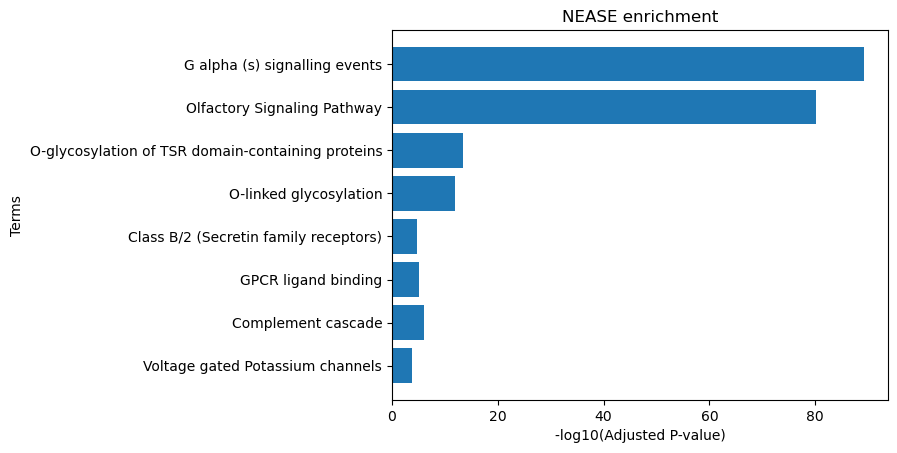

In [7]:
import numpy as np
import matplotlib.pyplot as plt
nease_enr=nease_enr.sort_values(by='Nease score',ascending=False)
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('data_nease/nease_enrichment_ext.png',bbox_inches='tight')
plt.show()

In [21]:
events.path_analysis('R-HSA-6794361')

Enrichment of the pathway: Neurexins and neuroligins.

Overall p_value:  1.6217784559647146e-16




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GRIN1,2902,True,19/126,8.415061e-24,"GRM5,LRRTM4,GRIN2D,HOMER2,GRIN2C,GRIN2A,LRRTM2,DLGAP1,LIN7A,CASK,HOMER1,DLGAP4,GRIN1,DLGAP2,DLG2,GRIN2B,DLG4,DLG3,LRRTM3","2915,80059,2906,9455,2905,2903,26045,9229,8825,8573,9456,22839,2902,9228,1740,2904,1742,1741,347731"
1,GRIA1,2890,False,2/14,1.628851e-03,"EPB41L1,EPB41L2","2036,2037"
2,DMD,1756,False,3/117,1.439389e-02,"CASK,DLG2,DLG3","8573,1740,1741"
3,MYH10,4628,False,1/33,1.328075e-01,EPB41,2035
4,SYNE1,23345,False,1/94,3.336870e-01,DLG2,1740
5,BRAF,673,False,1/181,5.425287e-01,GRIN1,2902


In [15]:
events.path_analysis('R-HSA-5683057')

Enrichment of the pathway: MAPK family signaling cascades.

Overall p_value:  1.6931183709279759e-07




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,BRAF,673,True,56/181,6.756484e-23,"KIT,RAP1B,IQGAP1,FGF9,PRKACA,SHC3,FGF2,BRAF,MET,RAF1,SHC2,FGF20,ERBB3,RET,KRAS,PTPN11,PAK2,MAPK1,PAK3,FGFR4,PDGFRB,PRKACB,ARAF,KSR2,FGFR3,SHC1,FGFR1,JAK2,RAP1A,MAPK6,MAPK3,MAP2K2,ERBB2,MAPK4,CAMK2A,MAP2K1,PAK1,GRIN1,CDK1,NRAS,JAK3,FGFR2,YWHAB,HRAS,PDGFRA,FYN,EGFR,CSK,CAMK2G,CAMK2D,PRKACG,KSR1,JAK1,CAMK2B,ERBB4,CNKSR2","3815,5908,8826,2254,5566,53358,2247,673,4233,5894,25759,26281,2065,5979,3845,5781,5062,5594,5063,2264,5159,5567,369,283455,2261,6464,2260,3717,5906,5597,5595,5605,2064,5596,815,5604,5058,2902,983,4893,3718,2263,7529,3265,5156,2534,1956,1445,818,817,5568,8844,3716,816,2066,22866"
1,GRIN1,2902,True,14/126,4.143083e-02,"BRAF,RAF1,GRIN2D,PPP5C,SPTAN1,GRIN2C,GRIN2A,GRIN1,GRIN2B,DLG4,FYN,PTK2,CAMK2G,ERBB4","673,5894,2906,5536,6709,2905,2903,2902,2904,1742,2534,5747,818,2066"
2,MYH10,4628,False,5/33,6.552697e-02,"IQGAP1,PAK2,GRB2,CDC42,SHC1","8826,5062,2885,998,6464"
3,MAP2K4,6416,False,5/34,7.279564e-02,"MAP3K11,UBC,MAPK1,EGFR,JUN","4296,7316,5594,1956,3725"
4,ATP2B1,490,False,1/5,2.915591e-01,CALM1,801
5,SLC25A25,114789,False,2/30,6.029219e-01,"DUSP1,SPTAN1","1843,6709"
6,DMD,1756,False,5/117,8.961835e-01,"IQGAP1,RAC1,FYN,CSK,VCL","8826,5879,2534,1445,7414"
7,SYNE1,23345,False,2/94,9.881990e-01,"IQGAP1,VCL","8826,7414"
